# Gerekli kütüphaneleri import edelim

In [1]:
import cv2, os
import matplotlib.pyplot as plt
%matplotlib inline

# Aşağıdaki işlem şu:

1. **content** dizinine gittik
2. **darknet** adında bir dizin varsa onu sildik
1. ** YOLO V3 **'nin olduğu repo'yu klon ettik.
2. o repo'nun adı **darknet** olduğu için **cd** komutu ile o dizine gittik.
1. bir takım **stream editor (sed)** işlemleri yaptık
2. yine bir takım **advanced package tool (apt)** işlemleri yaptık


In [2]:
!ls
!cd /content
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!apt update
!apt-get install libopencv-dev

sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 14263, done.
remote: Total 14263 (delta 0), reused 0 (delta 0), pack-reused 14263
Receiving objects: 100% (14263/14263), 12.63 MiB | 15.60 MiB/s, done.
Resolving deltas: 100% (9774/9774), done.
/content/darknet
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 

## compile.log oluşturduk.

In [3]:
!make &> compile.log

## modelin ağırlıklarını **wget** komutu ile indirdik

In [4]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-08-22 08:19:45--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   905KB/s    in 3m 40s  

2020-08-22 08:23:26 (1.07 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## modeli gmrüntü üzerinde test etmek için bir fonksiyon yazdık.

In [5]:
def predictImage(imageDir):
  os.system("cd /content/darknet && ./darknet detect cfg/yolov3.cfg yolov3.weights {}".format(imageDir))
  image = cv2.imread("/content/darknet/predictions.jpg")
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## test ağırlılarını indirdik

In [6]:
!wget https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.jpg
!ls

--2020-08-22 08:23:33--  https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.jpg [following]
--2020-08-22 08:23:33--  https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68535 (67K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  66.93K  --.-KB/s    in 0.02s   

2020-08-22 08:23:33 (2.92 MB/s) - ‘test.jpg’ saved [68535/68535]

3rdparty	compile.log		include		       scripts
back

## tahmin yapalım

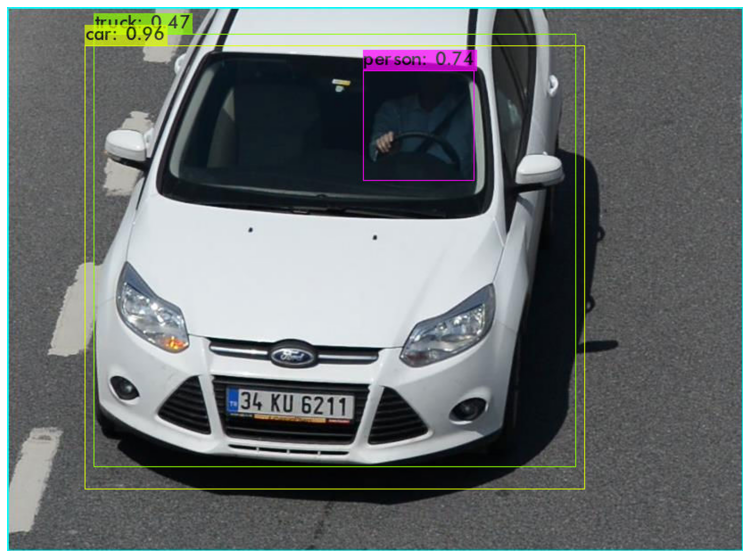

In [20]:
predictImage("test.jpg")

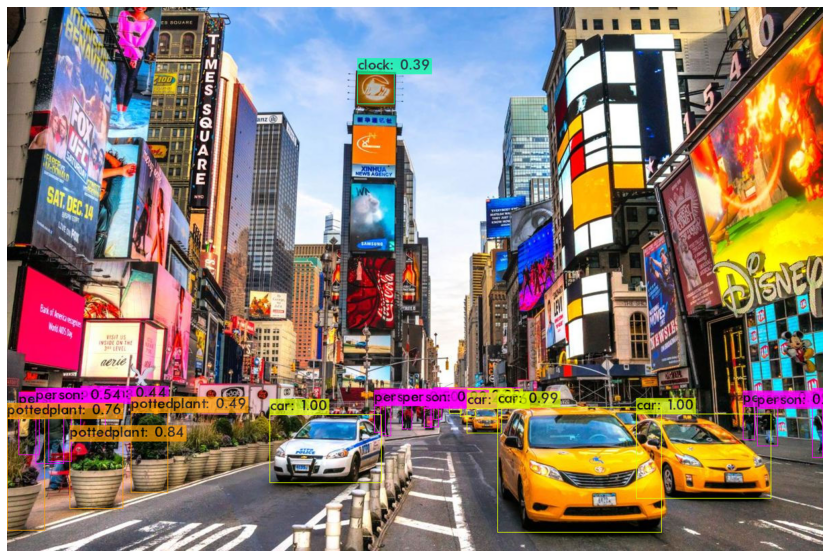

In [34]:
predictImage("timesquare.jpg")

## bir de video üzerinde deneyelim

In [15]:
def predictVideo(videoDir):
  os.system(""" cd /content/darknet && ./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights \
  -dont_show {} -i 0 -out_filename output.avi
  """.format(videoDir))

In [8]:
!wget https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.avi
!ls

--2020-08-22 08:24:00--  https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.avi
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.avi [following]
--2020-08-22 08:24:01--  https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.avi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15897530 (15M) [application/octet-stream]
Saving to: ‘test.avi’

test.avi            100%[===================>]  15.16M  45.0MB/s    in 0.3s    

2020-08-22 08:24:01 (45.0 MB/s) - ‘test.avi’ saved [15897530/15897530]

3rdparty	compile.log		inclu

In [16]:
predictVideo("normal.avi")

## ilgili videomuz yine darknet dizininin içinde. İstediğimiz dosyayı oraya atmamız gerekli (önemli not)

In [17]:
!du -h output.avi

12M	output.avi


## modelin denediği dosyayı kendi bilgisayarımıza indirelim

In [18]:
from google.colab import files

files.download('/content/darknet/output.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>